In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
data = pd.read_csv('../rumikon/Voronezh-population-2023-05-12.csv', sep = ',')

In [51]:
data.head()

,date,Population,Annual Change
0,1950-12-31,332000,NaN
1,1951-12-31,344000,3.61
2,1952-12-31,356000,3.49
3,1953-12-31,369000,3.65
4,1954-12-31,382000,3.52


In [44]:
query_result = data.query('date > "1990-12-31" and date < "2023-12-31"')

In [45]:
query_result = query_result.rename(columns=lambda x: x.replace(' ', ''))

In [46]:
query_result = query_result.drop("AnnualChange", axis = 1)

In [52]:
query_result['date'] = pd.to_datetime(query_result['date'])
# извлечение года из колонки с датой
query_result['year'] = pd.to_datetime(query_result['date']).dt.year

# удаление колонки с датой
query_result = query_result.drop('date', axis=1)

In [56]:
n = query_result.year
m = query_result.Population

32
32


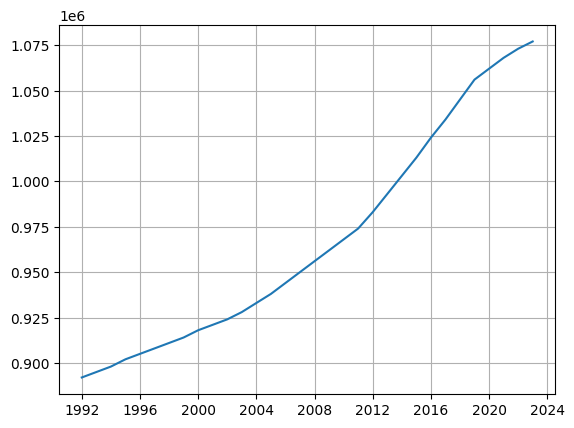

In [55]:
print(len(n))
print(len(m))
plt.plot(n,m)
plt.grid(True)
plt.show()

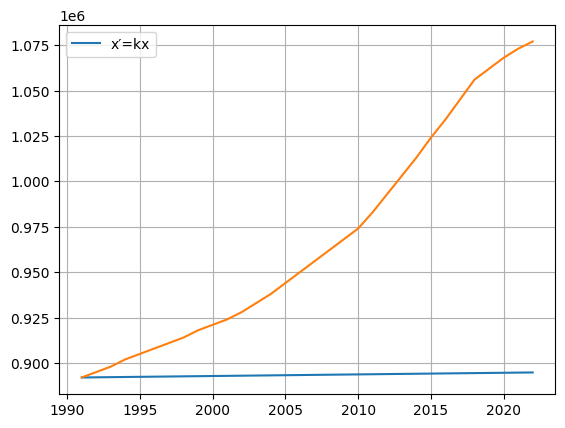

In [62]:
def dydt(x,n):
  k = 0.0001
  return k*x
solve = odeint(dydt, 892000, t=n)
solve = solve.flatten()
%matplotlib inline 
plt.plot(n, solve, label = r"x′=kx")
plt.plot(n, m)
plt.grid(True)
plt.legend()
plt.show()

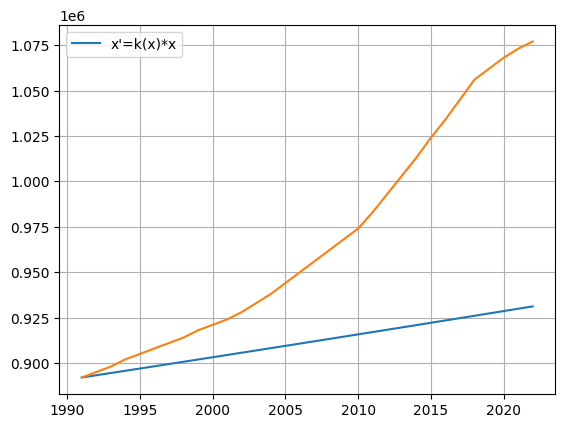

In [64]:
a=-100000
b=0.5
def dydt(x,n):
  return k(x)*x*0.00355
def k(x):
  return a/x+b
solve = odeint(dydt, 892000, t=n)
solve = solve.flatten()
%matplotlib inline 


plt.plot(n, solve, label = r"x'=k(x)*x")
plt.plot(n, m)
plt.grid(True)
plt.legend()
plt.show()